In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### 과제 1_0517
전처리 사용자 함수 transform_features(df)를 생성하여 적용하고 알고리즘 dt를 사용하여 모델링 및 성능 평가를 수행하시오.

In [2]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 15: cat = 'Child'
    elif age <= 20: cat = 'Teenager'
    elif age <= 30: cat = 'Twenties'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 50: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
def Fare_Cat(fare):
    cat = ''
    if fare <= -1: cat = 'Unknown'
    elif fare <= 8: cat = 'Very Low'
    elif fare <= 11: cat = 'Low'
    elif fare <= 25: cat = 'Middle'
    elif fare <= 50: cat = 'High'
    elif fare <= 100: cat = 'Very High'
    else : cat = 'Extra High'
    
    return cat
def transform_features(df):
    df.dropna(axis = 1, thresh = len(titanic_df)/2, inplace = True)
    
    big = df["Embarked"].value_counts().idxmax()
    df["Embarked"].fillna(big, inplace = True)
    
    pattern = r", (.*?)\."
    df["Title"] = df["Name"].apply(lambda x: re.search(pattern, x).group(1))
    
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(round(x.mean(),0)))
    
    df.drop(['Name', "Ticket", "PassengerId", "SibSp", "Parch", "Embarked"], axis=1, inplace=True)
    
    df["Age_cat"] = df['Age'].apply(lambda x : get_category(x))
    
    df["Fare_cat"] = df['Fare'].apply(lambda x : Fare_Cat(x))
    
    df.drop(["Age", "Fare"] , axis=1, inplace=True)
    
    features = ["Pclass", "Sex", "Title", "Age_cat", "Fare_cat"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [3]:
titanic_df = pd.read_csv("../dataSet/train.csv")
y_titanic = titanic_df["Survived"]
X_titanic= titanic_df.drop('Survived',axis=1)

X_titanic = transform_features(X_titanic)

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic, y_titanic, \
                                                  test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)

In [5]:
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8547


### 과제2_0517
랜덤하게 2차원 배열을 생성한 후, 임계값을 0.5로 지정한 후 임계값보다 크면 1, 작으면 0으로 변환하시오.

In [6]:
ar = np.random.random(6).reshape(2,3)

binarizer = Binarizer(threshold = 0.5)
binarizer.fit_transform(ar)

array([[1., 1., 1.],
       [0., 1., 0.]])

### 과제 3_1517
타이타닉 데이터셋으로 모델링 한 후 ROC, AUC를 포함한 모든 분류 평가지표를 사용하여 평가를 수행하고 ROC AUC를 시각화하시오.

In [12]:
def get_clf_eval(y_test = None, pred = None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = round(accuracy_score(y_test, pred),4)
    precision = round(precision_score(y_test, pred),4)
    recall = round(recall_score(y_test, pred),4)
    f1 = round(f1_score(y_test, pred),4)
    roc_auc = round(roc_auc_score(y_test, pred_proba[:, 1]),4)
    print("오차 행렬")
    print(confusion)
    print(f"정확도 : {accuracy}, 정밀도 : {precision}\n재현율 : {recall}, f1 : {f1}")
    print(f"AUC : {roc_auc}")

In [13]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

오차 행렬
[[109   9]
 [ 17  44]]
정확도 : 0.8547, 정밀도 : 0.8302
재현율 : 0.7213, f1 : 0.7719
AUC : 0.8603


In [18]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label = "ROC")
    plt.plot([0,1],[0,1], "k--", label = "Random")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("FPR(1 - Soecificity)")
    plt.ylabel("TPR(Recall)")
    plt.legend()

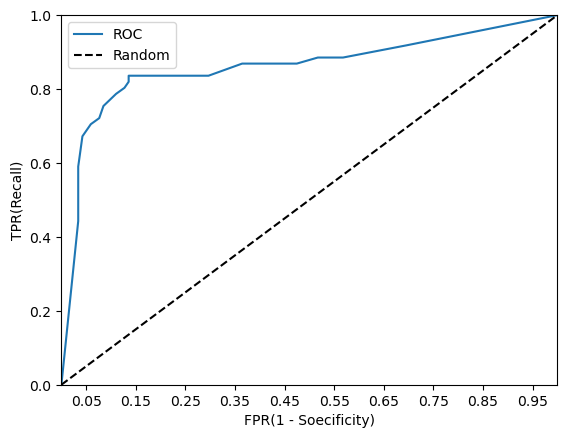

In [19]:
roc_curve_plot(y_test, dt_pred_proba[:,1])

NameError: name 'dt_pred_proba' is not defined